In [1]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
nltk.download('punkt')
import csv

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AshaM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Reading the dataset as a csv file
training_dataset = pd.read_csv("train.csv", encoding="ISO-8859-1")
training_dataset.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [3]:
new_data = training_dataset.rename(columns = {"Label": "Type"})
del new_data['actions']
del new_data['location']
new_data.head()

,Id,Tweet,following,followers,is_retweet,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,0.0,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,0.0,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,0.0,Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,0.0,Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,0.0,Spam


In [4]:
## Adding a new column to contain target variable
new_data["Label"] = [0 if x=="Quality" else 1 for x in new_data["Type"] ]
new_data.head()

,Id,Tweet,following,followers,is_retweet,Type,Label
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,0.0,Quality,0
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,0.0,Quality,0
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,0.0,Quality,0
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,0.0,Spam,1
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,0.0,Spam,1


In [5]:
df = pd.DataFrame(new_data)
df.head()

,Id,Tweet,following,followers,is_retweet,Type,Label
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,0.0,Quality,0
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,0.0,Quality,0
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,0.0,Quality,0
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,0.0,Spam,1
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,0.0,Spam,1


In [6]:
df.to_csv('New_Train.csv', index=False)

In [7]:
df = pd.read_csv('New_Train.csv')
df.head()

,Id,Tweet,following,followers,is_retweet,Type,Label
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,0.0,Quality,0
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,0.0,Quality,0
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,0.0,Quality,0
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,0.0,Spam,1
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,0.0,Spam,1


In [8]:
df.shape

(11968, 7)

In [9]:
df.columns

Index(['Id', 'Tweet', 'following', 'followers', 'is_retweet', 'Type', 'Label'], dtype='object')

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(11968, 7)

In [12]:
df.isnull().sum()

Id              0
Tweet           0
following     145
followers      16
is_retweet      1
Type            0
Label           0
dtype: int64

In [13]:
del df['Id']

In [14]:
del df['following']

In [15]:
del df['followers']

In [16]:
del df['is_retweet']

In [17]:
del df['Type']

In [18]:
df.head()

,Tweet,Label
0,It's the everything else that's complicated. #...,0
1,Eren sent a glare towards Mikasa then nodded a...,0
2,I posted a new photo to Facebook http://fb.me/...,0
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,1
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,1


In [19]:
df.shape

(11968, 2)

In [24]:
df.Label.value_counts()

0    6153
1    5815
Name: Label, dtype: int64

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AshaM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def processtweet(tweet):
    '''
    What will be covered:
    1. Remove punctuation
    2. Remove stopwords
    3. Return list of clean text words
    '''
    
    #1
    remove_punctuation = [char for char in tweet if char not in string.punctuation]
    remove_punctuation = ''.join(remove_punctuation)
    
    #2
    clean_text = [word for word in remove_punctuation.split() if word.lower() not in stopwords.words('english')]
    
    #3
    return clean_text

In [22]:
'''import re

def processTweet(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub(r'http\S+', '', tweet.lower())
    #Convert @username to USER
    tweet = re.sub('@[^\s]+','user',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', 'hashtag', tweet)
    #trim
    tweet = tweet.strip('\'"')
    return tweet

processedtweets=[]       
for tweet in tweets:'''
'''#processedTweet = processTweet(tweet)
    processedtweets.append(processTweet(tweet))
#print processedtweets'''
        
'''stopWords = []
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)

stopWords = []
stopWords.append('user')
stopWords.append('hashtag')''''''
#print stopWords

fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords    
     '''

'''def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    #print words
    for w in words:
    
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word starts with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w not in stopWords ) and val:
            featureVector.append(w.lower())
    return featureVector'''


'def getFeatureVector(tweet):\n    featureVector = []\n    #split tweet into words\n    words = tweet.split()\n    #print words\n    for w in words:\n    \n        #replace two or more with two occurrences\n        w = replaceTwoOrMore(w)\n        #strip punctuation\n        w = w.strip(\'\'"?,.\')\n        #check if the word starts with an alphabet\n        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)\n        #ignore if it is a stop word\n        if(w not in stopWords ) and val:\n            featureVector.append(w.lower())\n    return featureVector'

In [23]:
df['Tweet'].head().apply(processtweet)

0    [everything, else, thats, complicated, PESummi...
1    [Eren, sent, glare, towards, Mikasa, nodded, s...
2    [posted, new, photo, Facebook, httpfbme2Be7LiyuJ]
3    [jan, Idiot, Chelsea, Handler, Diagnoses, Trum...
4    [Pedophile, Anthony, Weiner, TERRIFIED, Gettin...
Name: Tweet, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
text = CountVectorizer(analyzer=processtweet).fit_transform(df['Tweet'])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text, df['Label'].values, test_size = 0.20, random_state = 0)

In [27]:
text.shape

(11968, 39141)

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9574, 39141)
(9574,)
(2394, 39141)
(2394,)


In [29]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [30]:
#Print the predictions
print(classifier.predict(x_train))

#Print the actual values
print(y_train)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [29]:
pip install pandas_ml

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas_ml

In [31]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [32]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from pandas_ml import ConfusionMatrix
prediction = classifier.predict(x_train)
matrix = ConfusionMatrix(y_train,prediction)
print(classification_report(y_train ,prediction))
print('Confusion Matrix: \n',confusion_matrix(y_train,prediction))
print()
print('Accuracy: ', accuracy_score(y_train,prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4932
           1       0.98      0.96      0.97      4642

    accuracy                           0.97      9574
   macro avg       0.97      0.97      0.97      9574
weighted avg       0.97      0.97      0.97      9574

Confusion Matrix: 
 [[4857   75]
 [ 173 4469]]

Accuracy:  0.9740965113850011


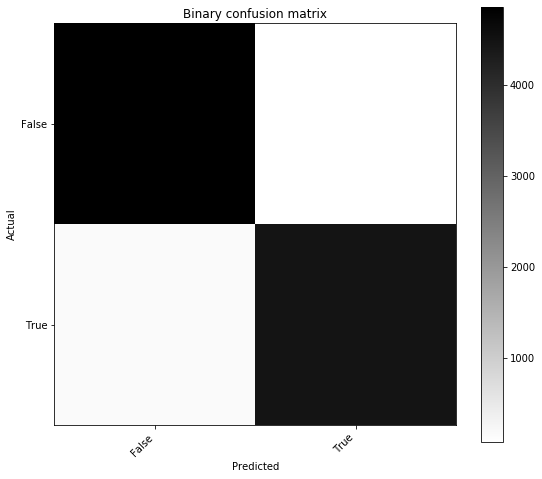

In [33]:
import matplotlib.pyplot as plt
matrix.plot()

In [34]:
print('Predicted value: ',classifier.predict(x_test))

#Print Actual Label
print('Actual value: ',y_test)

Predicted value:  [0 0 0 ... 0 1 1]
Actual value:  [0 0 0 ... 0 1 1]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction1 = classifier.predict(x_test)
matrix1 = ConfusionMatrix(y_test,prediction1)
print(classification_report(y_test ,prediction1 ))

print('Confusion Matrix: \n', ConfusionMatrix(y_test,prediction1))
print()
print('Accuracy: ', accuracy_score(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1221
           1       0.87      0.83      0.85      1173

    accuracy                           0.85      2394
   macro avg       0.85      0.85      0.85      2394
weighted avg       0.85      0.85      0.85      2394

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       1074   147     1221
True         204   969     1173
__all__     1278  1116     2394

Accuracy:  0.8533834586466166


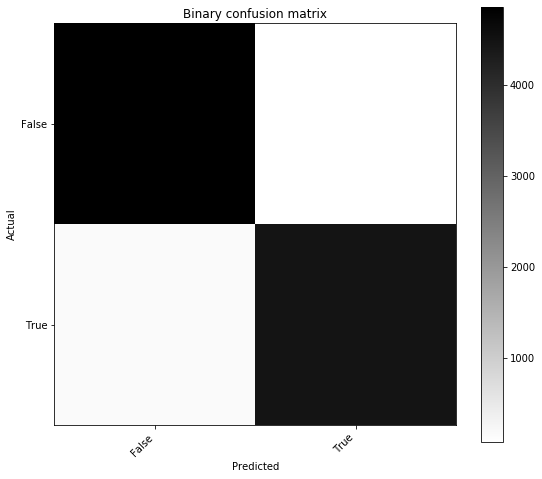

In [36]:
matrix.plot()

In [43]:
from sklearn import svm, datasets
classifier1 = svm.SVC(kernel='linear', C=0.01).fit(x_train, y_train)

In [44]:
#Print the predictions
print(classifier1.predict(x_train))

#Print the actual values
print(y_train)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [45]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction2 = classifier1.predict(x_train)
cm= ConfusionMatrix(y_train,prediction2)
print(classification_report(y_train ,prediction2))
print('Confusion Matrix: \n',ConfusionMatrix(y_train,prediction2))
print()
print('Accuracy: ', accuracy_score(y_train,prediction2))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      4932
           1       0.94      0.74      0.83      4642

    accuracy                           0.85      9574
   macro avg       0.87      0.85      0.85      9574
weighted avg       0.87      0.85      0.85      9574

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       4730   202     4932
True        1205  3437     4642
__all__     5935  3639     9574

Accuracy:  0.8530394819302277


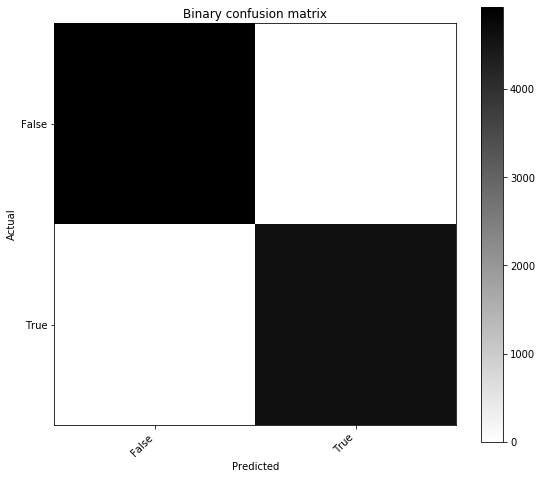

In [40]:
cm.plot()

In [41]:
print('Predicted value: ',classifier1.predict(x_test))

#Print Actual Label
print('Actual value: ',y_test)

Predicted value:  [0 0 0 ... 0 1 1]
Actual value:  [0 0 0 ... 0 1 1]


In [42]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction3 = classifier1.predict(x_test)
cm1= ConfusionMatrix(y_test,prediction3)
print(classification_report(y_test ,prediction3 ))

print('Confusion Matrix: \n', ConfusionMatrix(y_test,prediction3))
print()
print('Accuracy: ', accuracy_score(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      1221
           1       0.87      0.75      0.80      1173

    accuracy                           0.82      2394
   macro avg       0.83      0.82      0.82      2394
weighted avg       0.83      0.82      0.82      2394

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       1086   135     1221
True         295   878     1173
__all__     1381  1013     2394

Accuracy:  0.8203842940685045


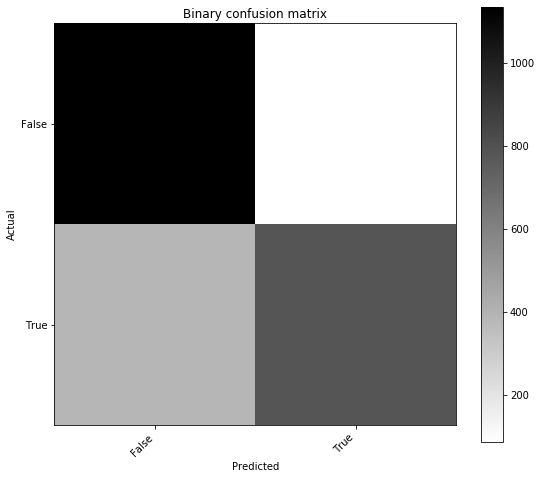

In [48]:
cm1.plot()

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
#Print the predictions
print(classifier3.predict(x_train))

#Print the actual values
print(y_train)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [80]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction3 = classifier3.predict(x_train)
km= ConfusionMatrix(y_train,prediction3)
print(classification_report(y_train ,prediction3))
print('Confusion Matrix: \n',ConfusionMatrix(y_train,prediction3))
print()
print('Accuracy: ', accuracy_score(y_train,prediction3))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4932
           1       0.99      0.02      0.03      4642

    accuracy                           0.52      9574
   macro avg       0.75      0.51      0.36      9574
weighted avg       0.75      0.52      0.37      9574

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       4931     1     4932
True        4571    71     4642
__all__     9502    72     9574

Accuracy:  0.5224566534363903


In [60]:
print('Predicted value: ',classifier3.predict(x_test))

#Print Actual Label
print('Actual value: ',y_test)

Predicted value:  [0 0 0 ... 0 0 0]
Actual value:  [0 0 0 ... 0 1 1]


In [62]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction3 = classifier3.predict(x_test)
cm1= ConfusionMatrix(y_test,prediction3)
print(classification_report(y_test ,prediction3 ))

print('Confusion Matrix: \n', ConfusionMatrix(y_test,prediction3))
print()
print('Accuracy: ', accuracy_score(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68      1221
           1       1.00      0.00      0.01      1173

    accuracy                           0.51      2394
   macro avg       0.76      0.50      0.34      2394
weighted avg       0.75      0.51      0.35      2394

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       1221     0     1221
True        1168     5     1173
__all__     2389     5     2394

Accuracy:  0.5121136173767753


In [57]:
from sklearn.naive_bayes import BernoulliNB
classifier2 = BernoulliNB()
classifier2.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [59]:
#Print the predictions
print(classifier2.predict(x_train))

#Print the actual values
print(y_train)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


In [62]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction = classifier2.predict(x_train)
mat = ConfusionMatrix(y_train,prediction)
print(classification_report(y_train ,prediction))
print('Confusion Matrix: \n',ConfusionMatrix(y_train,prediction))
print()
print('Accuracy: ', accuracy_score(y_train,prediction))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4932
           1       0.99      0.92      0.95      4642

    accuracy                           0.96      9574
   macro avg       0.96      0.96      0.96      9574
weighted avg       0.96      0.96      0.96      9574

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       4902    30     4932
True         375  4267     4642
__all__     5277  4297     9574

Accuracy:  0.9576979318988929


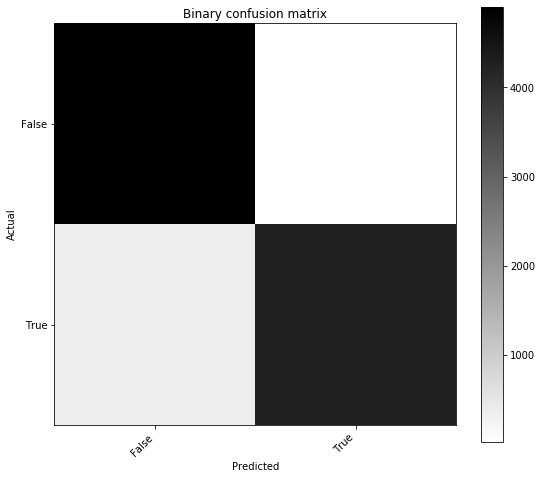

In [63]:
mat.plot()

In [64]:
print('Predicted value: ',classifier2.predict(x_test))

#Print Actual Label
print('Actual value: ',y_test)

Predicted value:  [0 0 0 ... 0 1 1]
Actual value:  [0 0 0 ... 0 1 1]


In [65]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
prediction = classifier2.predict(x_test)
mat1 = ConfusionMatrix(y_test,prediction)
print(classification_report(y_test ,prediction ))

print('Confusion Matrix: \n', ConfusionMatrix(y_test,prediction))
print()
print('Accuracy: ', accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1221
           1       0.92      0.73      0.82      1173

    accuracy                           0.84      2394
   macro avg       0.85      0.84      0.84      2394
weighted avg       0.85      0.84      0.84      2394

Confusion Matrix: 
 Predicted  False  True  __all__
Actual                         
False       1149    72     1221
True         313   860     1173
__all__     1462   932     2394

Accuracy:  0.8391812865497076


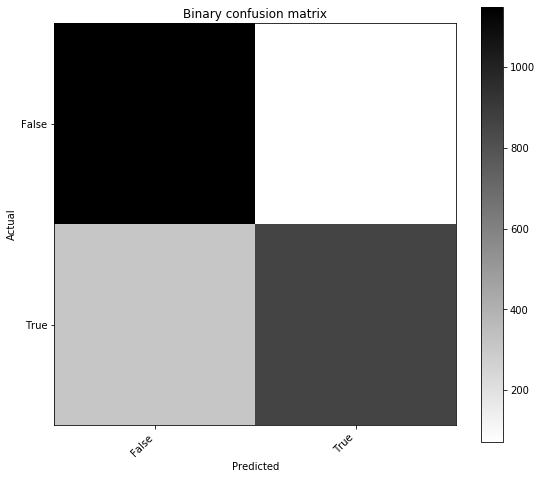

In [66]:
mat1.plot()

In [82]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

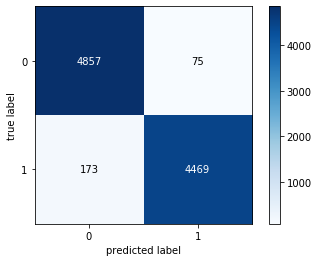

In [73]:
binary = np.array([[4857, 75],
                   [173 , 4469]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

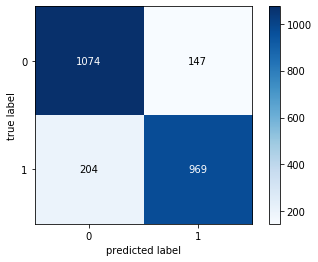

In [75]:
binary = np.array([[1074, 147],
                   [204, 969]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

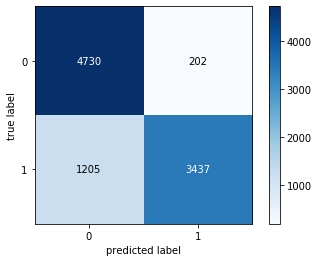

In [76]:
binary = np.array([[4730, 202],
                   [1205, 3437]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

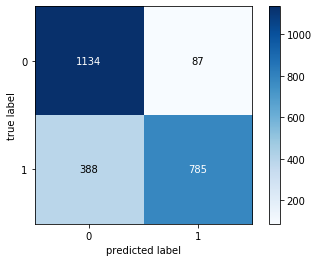

In [77]:
binary = np.array([[1134, 87],
                   [388, 785]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

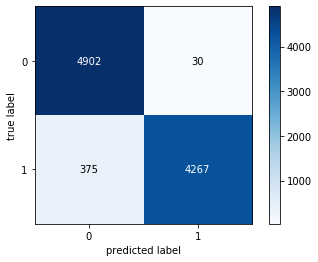

In [78]:
binary = np.array([[4902, 30],
                   [375, 4267]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

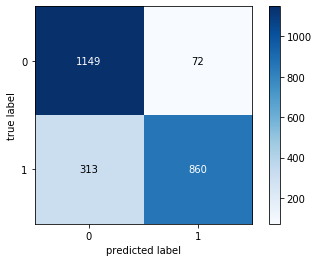

In [79]:
binary = np.array([[1149, 72],
                   [313, 860]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

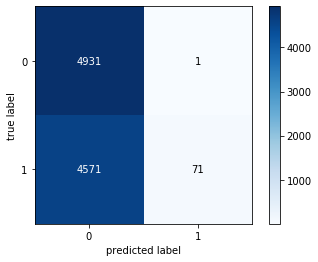

In [83]:
binary = np.array([[4931, 1],
                   [4571, 71]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()

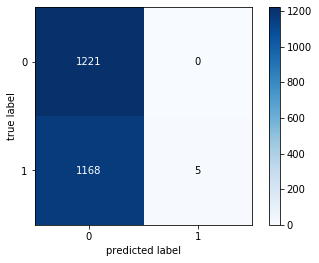

In [84]:
binary = np.array([[1221, 0],
                   [1168, 5]])

fig, ax = plot_confusion_matrix(conf_mat=binary, colorbar=True)
plt.show()